In [2]:
import pandas as pd


## File 1-Firearms Death Rate per 100,000

In [11]:

#source: https://www.cbsnews.com/pictures/gun-ownership-rates-by-state/
df=pd.read_csv("https://raw.githubusercontent.com/Kushall-Dayal/Gun_violence/master/2015.csv")
#len(df)

## File 2-Gun Ownership(percentage)

In [13]:
#Note: The Data belongs to the year 2015 ,No such data is available for the years after 2015 
#Source:https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
df2=pd.read_csv("https://raw.githubusercontent.com/Kushall-Dayal/Gun_violence/master/Gun%20ownership%20by%202015.csv")
#len(df2)

In [15]:
df3=df.merge(df2)
#(df3.head(5))

,Location,"Firearms Death Rate per 100,000",Gun Ownership(percentage)
0,Alabama,19.7,48.9
1,Alaska,23.4,61.7
2,Arizona,13.8,32.3
3,Arkansas,17.0,57.9
4,California,7.7,19.8


## File 3-State Abbreviations

In [16]:
stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')

In [19]:
df4=df3.merge(stateabbr[["state","abbr"]],left_on="Location",right_on="state" )

In [26]:
#df4

Plot Graph

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

Text(0.5, 1.0, 'Gun Ownership vs. Gun Deaths (2015)')

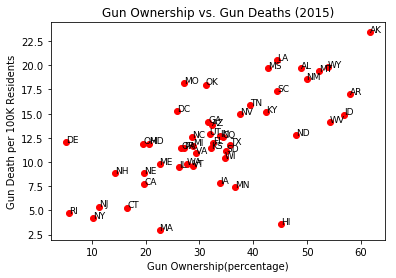

In [27]:
Y = df4["Firearms Death Rate per 100,000"]
X = df4["Gun Ownership(percentage)"]
n = df4.abbr


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Ownership(percentage)')
plt.ylabel('Gun Death per 100K Residents')
plt.title('Gun Ownership vs. Gun Deaths (2015)')

# Death rate 2016

In [133]:
df5=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/yr2016firearmdeathrate.csv')

In [134]:
df5=df5.iloc[1:,]

In [135]:
df5

,Location,"Firearms Death Rate per 100,000"
1,Alabama,21.5
2,Alaska,23.3
3,Arizona,15.2
4,Arkansas,17.8
5,California,7.9
6,Colorado,14.3
7,Connecticut,4.6
8,Delaware,11.0
9,District of Columbia,13.8
10,Florida,12.6


# Gun Ownership 2016

In [136]:
df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/licensed_ownership_bystate.csv')
df.reset_index(inplace=True)
df1=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/1999-2017-State-SuicideFirearm.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/1999-2017-State-Suicide-NonFirearm.csv')
miscState = {'North Carolina':'North_Carolina','South Carolina':'South_Carolina','North Dakota':'North_Dakota',
                'South Dakota':'South_Dakota','New Hampshire':'New_Hampshire','New Jersey':'New_Jersey',
                'New Mexico':'New_Mexico','Rhode Island':'Rhode_Island','West Virginia':'West_Virginia',
                'New York':'New_York','Other US Territories':'Other_US_Territories','District of Columbia':'District_of_Columbia'
                }
df1=df1.replace({"State": miscState})
df2=df2.replace({"State": miscState})
final_df=pd.merge(df,df1,on=["State","Year"])
final_df2=pd.merge(df,df2,on=["State","Year"])
final_df['Guns_Per1000']=round((final_df['Total']/final_df['Population'])*1000)
final_df2['Guns_Per1000']=round((final_df2['Total']/final_df2['Population'])*1000)
final_dff=pd.concat([final_df,final_df2])
#final_dff

In [137]:
df6=final_dff[final_dff.Year==2016][["State","Guns_Per1000"]].reset_index()

In [138]:
#len(df6)
df6=df6[["State","Guns_Per1000"]]

In [139]:
df6=df6.drop_duplicates()

In [140]:
len(df6)
#df6.head(60)

51

In [141]:
df7=pd.DataFrame(df5["Location"])

In [142]:
df6=df6.rename(columns={"State":"Location"})

In [126]:
df7.head()

,State
1,Alabama
2,Alaska
3,Arizona
4,Arkansas
5,California


In [143]:
df6.update(df7)

In [144]:
df6

,Location,Guns_Per1000
0,Alabama,33.0
1,Alabama,21.0
2,Alaska,27.0
3,Arizona,26.0
4,Arkansas,9.0
5,California,17.0
6,Colorado,23.0
7,Connecticut,69.0
8,Delaware,5.0
9,District of Columbia,17.0


In [91]:
#df6=df6.iloc[:,1:]

In [129]:
#df6[df.State=="Alabama"]

C:\Users\KushallYash\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,State,Guns_Per1000
0,Alabama,33.0


In [147]:
#merge df5 and df6

df8=df5.merge(df6)

In [148]:
df9=df8.merge(stateabbr[["state","abbr"]],left_on="Location",right_on="state" )

In [149]:
df9

,Location,"Firearms Death Rate per 100,000",Guns_Per1000,state,abbr
0,Alabama,21.5,33.0,Alabama,AL
1,Alabama,21.5,21.0,Alabama,AL
2,Alaska,23.3,27.0,Alaska,AK
3,Arizona,15.2,26.0,Arizona,AZ
4,Arkansas,17.8,9.0,Arkansas,AR
5,California,7.9,17.0,California,CA
6,Colorado,14.3,23.0,Colorado,CO
7,Connecticut,4.6,69.0,Connecticut,CT
8,Delaware,11.0,5.0,Delaware,DE
9,District of Columbia,13.8,17.0,District of Columbia,DC


Text(0.5, 1.0, 'Gun Ownership vs. Gun Deaths ')

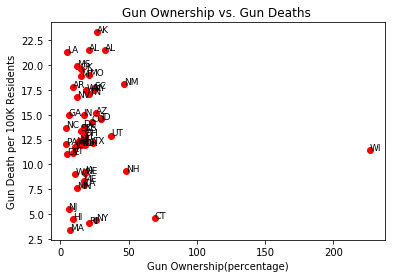

In [151]:
Y = df9["Firearms Death Rate per 100,000"]
X = df9["Guns_Per1000"]
n = df9.abbr


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.xlabel('Gun Ownership(percentage)')
plt.ylabel('Gun Death per 100K Residents')
plt.title('Gun Ownership vs. Gun Deaths ')